# Data Analytics w/Python

# HW5

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output, unless explicitly permitted
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Set Description

## USA.gov Data from Bitly

In 2011, URL shortening service Bitly *Bitly.com* partnered with the US goverment website *USA.gov* to provide a feed of anonymous data gathered from users who shorten links ending with *.gov* or *.mil*.  This service is shut down at 2017. 

In this database, each line contains a common form of web data known as **JSON**, which stands for *JavaScript Object Notation* . Python has both built-in and 3rd party libraries for converting a JSON string into a Python dictionary object. Then we can use *pd.DataFrame* convert dictionary object into Dataframe for our analysis.

each line has a number of identifying attributes.

In [18]: records[0] <br>
Out[18]: <br>
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11', <br>
 'al': 'en-US,en;q=0.8', <br>
 'c': 'US',<br>
 'cy': 'Danvers',<br>
 'g': 'A6qOVH',<br>
 'gr': 'MA',<br>
 'h': 'wfLQtf',<br>
 'hc': 1331822918,<br>
 'hh': '1.usa.gov',<br>
 'l': 'orofrog',<br>
 'll': [42.576698, -70.954903],<br>
 'nk': 1,<br>
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',<br>
 't': 1331923247,<br>
 'tz': 'America/New_York',<br>
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}<br>
 

In [10]:
import json
file_name = 'bitly_usagov_example.txt'
records = [json.loads(line) for line in open(file_name)]

In [12]:
records[0:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

* **a**: info. about browser, device or application used to perform the URL shortening. 
* **c**: country
* **cy**: city
* **gr**: state
* **ll**: longitude and latitude
* **tz**: TimeZone
* **u**: original URL being shorted

In [15]:
type(records)

list

In [17]:
type(records[0])

dict

## Convert this dictionary *records* into DataFrame. (find out which method to use yourself)

In [20]:
df = pd.DataFrame.from_dict(records)

In [22]:
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


### Q1.1,   How many records are in the Dataframe? (In Camino, pick the right number)

In [25]:
len(df)

3560

### Q1.2,   In column city('cy'), how many records are Nan? (In Camino, pick the right number)

In [28]:
len(df[df.cy.isna()])

641

### Q1.3,   Exclude Nan, how many different countries this dataset include?  (In Camino, pick the right number)

If include Nan or nan:

In [32]:
df.c.unique()

array(['US', 'BR', 'PL', None, nan, 'HK', 'IT', 'ES', 'MY', 'CY', 'GB',
       'MT', 'PT', 'FR', 'DK', 'MX', 'IE', 'BE', 'CA', 'NL', 'CZ', 'SE',
       'TH', 'DE', 'HU', 'JP', 'AT', 'IL', 'PK', 'CO', 'IN', 'MK', 'LB',
       'AU', 'CL', 'SK', 'EG', 'TR', 'RU', 'BG', 'SI', 'FI', 'RO', 'CH',
       'PR', 'GR', 'LV', 'AR', 'AE', 'NO', 'PH', 'VE', 'SA', 'UY', 'KR',
       'UA', 'RS', 'CR', 'PE', 'ID', 'LT', 'NI', 'ZM', 'EC', 'CN', 'JO',
       'ZA', 'KN', 'NZ', 'DO', 'BO', 'MA', 'HN'], dtype=object)

In [34]:
len(df.c.unique())

73

First need to exclude country with Nan :

In [37]:
df[df.c.notna()].c.unique()

array(['US', 'BR', 'PL', 'HK', 'IT', 'ES', 'MY', 'CY', 'GB', 'MT', 'PT',
       'FR', 'DK', 'MX', 'IE', 'BE', 'CA', 'NL', 'CZ', 'SE', 'TH', 'DE',
       'HU', 'JP', 'AT', 'IL', 'PK', 'CO', 'IN', 'MK', 'LB', 'AU', 'CL',
       'SK', 'EG', 'TR', 'RU', 'BG', 'SI', 'FI', 'RO', 'CH', 'PR', 'GR',
       'LV', 'AR', 'AE', 'NO', 'PH', 'VE', 'SA', 'UY', 'KR', 'UA', 'RS',
       'CR', 'PE', 'ID', 'LT', 'NI', 'ZM', 'EC', 'CN', 'JO', 'ZA', 'KN',
       'NZ', 'DO', 'BO', 'MA', 'HN'], dtype=object)

In [39]:
len(df[df.c.notna()].c.unique())

71

### Q1.4, Outside of US, what's the top 5 cities use this Bitly service? (In Camino, choose the  city name with the most usage)

In [42]:
df[df.c!='US'].groupby('cy').size().nlargest()

cy
Nogata    29
London    16
Madrid    13
Mexico    12
SPaulo    11
dtype: int64

## Q2

### Q2.1, How many records are from Russia?  (In Camino, pick the right number)

In [46]:
df_RU =df[df.c=='RU']
len(df_RU)

13

### Q2.2, In those records, which city has the highest usage count ?  (In Camino, pick the right city name)

In [49]:
df_RU.groupby('cy').size()

cy
Kirov               1
Krasnodar           1
Moscow              8
Novosibirsk         1
Saint Petersburg    2
dtype: int64

In [51]:
df_RU.groupby('cy').size().idxmax()

'Moscow'

### Q2.3, In those records, how many access to cia.gov  (In Camino, pick the right number) 

In [54]:
df_RU.u

498     http://www.nasa.gov/multimedia/imagegallery/im...
555     http://www.nasa.gov/mission_pages/nustar/main/...
764     https://www.cia.gov/library/publications/world...
777                          http://www.nps.gov/getaways/
1137    http://www.nasa.gov/mission_pages/nustar/main/...
1239    http://www.state.gov/r/pa/ei/bgn?utm_source=tw...
2637    http://www.nasa.gov/multimedia/imagegallery/im...
2998    http://www.nasa.gov/mission_pages/nustar/main/...
3033    http://www.nasa.gov/mission_pages/nustar/main/...
3117    http://www.nasa.gov/mission_pages/station/mult...
3159    http://www.nasa.gov/home/hqnews/2012/mar/HQ_M1...
3360    http://www.dol.gov/opa/media/press/ofccp/OFCCP...
3463    https://www.cia.gov/library/publications/the-w...
Name: u, dtype: object

In [56]:
(df_RU.u.str.contains('cia.gov')).sum()

2

In [58]:
df_RU[df_RU.u.str.contains('cia.gov')].u

764     https://www.cia.gov/library/publications/world...
3463    https://www.cia.gov/library/publications/the-w...
Name: u, dtype: object

## Q3 We are interested in time zones in this data set (the **tz** field). 

### Q3.1, Let's clean the tz field. If it is empty, filled with 'Unknown'. If it is NaN, filled with 'Missing'.  After cleaning, how many tz field are in 'Missing' state and how many are in 'Unknown' state?  (In Camino, fill in these two numbers in the format of 'Missing'/'Unknown')

In [62]:
df.tz.head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [64]:
df.tz.fillna(value='Missing',inplace=True)

In [66]:
Missing_count = (df.tz=='Missing').sum()
Missing_count

120

In [68]:
df.tz.replace(to_replace='', value='Unknown', inplace=True)

In [70]:
Unknown_count = (df.tz=='Unknown').sum()
Unknown_count

521

In [72]:
print ('Missing count: %d ' % Missing_count)
print ('Unknown count: %d ' % Unknown_count)

Missing count: 120 
Unknown count: 521 


### Q3.2, What's the top 10 timezone in this data set? (exclude Unknown and Missing) (In Camino, pick the 10th place timezone)

In [75]:
df_clean_tz = df[(df.tz!='Missing') & (df.tz!='Unknown')]

In [77]:
df_clean_tz.groupby('tz').size().nlargest(10)

tz
America/New_York       1251
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Europe/Berlin            28
dtype: int64

In [79]:
df_clean_tz.groupby('tz').size().nlargest(10).tail(1)

tz
Europe/Berlin    28
dtype: int64

### Q3.3 Make a horizontal bar plot based on previous question. (Use tz as Y-axis).  (In Camino, select the cities in the first 3 timezone, multiple choices)

In [82]:
subset_tz=df_clean_tz.groupby('tz').size().nlargest(10)

In [84]:
subset_tz

tz
America/New_York       1251
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Europe/Berlin            28
dtype: int64

<Axes: ylabel='tz'>

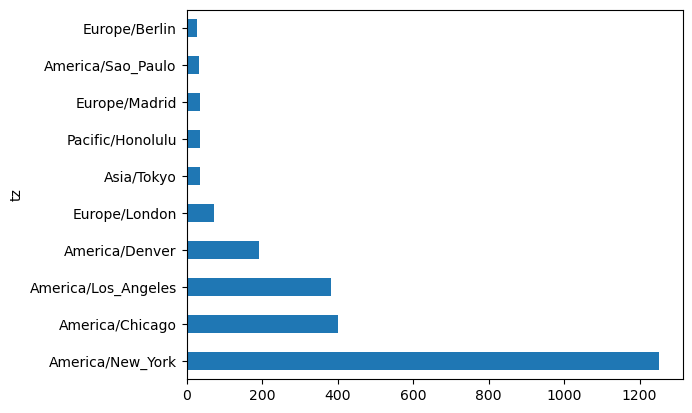

In [86]:
subset_tz.plot(kind='barh')

### Q3.4,  If based on 'c' field (Country) and the 'America' keyword in 'tz' field, count how many records are from US ? (In Camino, fill in those two count numbers in format of count_by_c/count_by_tz )

In [89]:
df.c.unique()

array(['US', 'BR', 'PL', None, nan, 'HK', 'IT', 'ES', 'MY', 'CY', 'GB',
       'MT', 'PT', 'FR', 'DK', 'MX', 'IE', 'BE', 'CA', 'NL', 'CZ', 'SE',
       'TH', 'DE', 'HU', 'JP', 'AT', 'IL', 'PK', 'CO', 'IN', 'MK', 'LB',
       'AU', 'CL', 'SK', 'EG', 'TR', 'RU', 'BG', 'SI', 'FI', 'RO', 'CH',
       'PR', 'GR', 'LV', 'AR', 'AE', 'NO', 'PH', 'VE', 'SA', 'UY', 'KR',
       'UA', 'RS', 'CR', 'PE', 'ID', 'LT', 'NI', 'ZM', 'EC', 'CN', 'JO',
       'ZA', 'KN', 'NZ', 'DO', 'BO', 'MA', 'HN'], dtype=object)

In [91]:
df.tz.unique()[0:10]

array(['America/New_York', 'America/Denver', 'America/Sao_Paulo',
       'Europe/Warsaw', 'Unknown', 'America/Los_Angeles', 'Missing',
       'Asia/Hong_Kong', 'Europe/Rome', 'Africa/Ceuta'], dtype=object)

In [93]:
count_US = (df.c=='US').sum()
count_US

2305

In [95]:
count_America = (df.tz.str.contains('America')).sum()
count_America

2412

>#### So counts from field 'tz' and field 'c' are NOT the same !

### Q3.5,  Based on last question,  is both counts match ? If not, find out how many records are timezone with 'America' keyword but Country not in US? (In Camino, select the correct number)

In [99]:
Boolean_notUS_butAmerica = (df.c!='US')&(df.tz.str.contains('America'))
Boolean_notUS_butAmerica.sum()

143

In [101]:
df[Boolean_notUS_butAmerica][['c','tz']][0:10]

,c,tz
3,BR,America/Sao_Paulo
27,BR,America/Sao_Paulo
56,BR,America/Sao_Paulo
86,MX,America/Mazatlan
97,BR,America/Sao_Paulo
99,CA,America/Vancouver
110,BR,America/Sao_Paulo
131,CA,America/Rainy_River
167,BR,America/Sao_Paulo
214,CA,America/Rainy_River


> #### Because there are other countries also has Timezone starts with 'America/...'